# Analyzing clipped retreat data for langtang glaciers, processed on 4/3

**only 22 glaciers were successfully clipped, I think missing ones 

In [1]:
import xarray as xr
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datatree import DataTree
from datatree import open_datatree

In [2]:
import sys
sys.path.insert(0, '/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/retreat/')

import retreat_tools
import itslive_tools
import general_tools

## Add RGI, centerline data

In [3]:
rgi_path = '/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/data/rgi/'

In [4]:
rgi15 = gpd.read_file(os.path.join(rgi_path, 'rgi15/15_rgi60_SouthAsiaEast.shp'))
rgi15_prj = rgi15.to_crs('EPSG:32645')

In [71]:
rgi15_prj.loc[rgi15_prj['RGIId'] == 'RGI60-15.09271']

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
307,RGI60-15.09271,G085174E28408N,20091022,-9999999,85.174,28.408,15,1,8.179,4017,...,14,4007,0,0,1,0,9,9,CN5O186A0031,"POLYGON ((320383.068 3145256.145, 320383.906 3..."


In [72]:
rgi_ids = pd.read_csv('/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/data/manuscript_rgi_ids.csv', )
rgi_subset = rgi15_prj.loc[rgi15_prj['RGIId'].isin(rgi_ids['RGI_IDs'].to_list())]

In [73]:
rgi_subset.loc[rgi_subset['RGIId'] == 'RGI60-15.09271']

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
307,RGI60-15.09271,G085174E28408N,20091022,-9999999,85.174,28.408,15,1,8.179,4017,...,14,4007,0,0,1,0,9,9,CN5O186A0031,"POLYGON ((320383.068 3145256.145, 320383.906 3..."


In [74]:
lake_ids = ['RGI60-15.10255', 'RGI60-15.10285', 'RGI60-15.10279','RGI60-15.10286',
            'RGI60-15.09361','RGI60-15.09483','RGI60-15.10290','RGI60-15.10299']

In [75]:
rgi_lakes = rgi_subset.loc[rgi_subset['RGIId'].isin(lake_ids)]
rgi_lands = rgi_subset.loc[~rgi_subset['RGIId'].isin(lake_ids)]

In [76]:
land_ids = rgi_lands['RGIId'].to_list()

In [77]:
centerline_path = '/uufs/chpc.utah.edu/common/home/u1269862/2022/zhang_centerlines/'

In [78]:
flowlines_15 = gpd.read_file(os.path.join(centerline_path, '15_rgi60_SouthAsiaEast_final_lines.shp'))

In [79]:
flowlines_15_utm = flowlines_15.to_crs('EPSG:32645')

In [82]:
flowlines_15_sub = flowlines_15_utm.loc[flowlines_15_utm['GLIMS_ID'].isin(rgi_subset['GLIMSId'].to_list())]

In [96]:
flowlines_15_sub

,GLIMS_ID,Type,MaxL,MeanL,ELA,AccL,AblationL,geometry
3943,G085055E28346N,2,4642.0,3930.0,5403,2249.0,2392.0,"MULTILINESTRING ((308634.030 3135447.833, 3086..."
4086,G085645E28262N,3,13171.0,10323.0,5445,3343.0,9827.0,"MULTILINESTRING ((365956.115 3125220.981, 3660..."
4088,G085670E28312N,4,22132.0,16369.0,5342,6037.0,16095.0,"MULTILINESTRING ((377239.459 3123625.425, 3772..."
4141,G085747E28200N,2,10817.0,9039.0,5251,4352.0,6464.0,"MULTILINESTRING ((380087.417 3118608.364, 3800..."
4185,G085725E28163N,2,8177.0,5754.0,5332,3489.0,4687.0,"MULTILINESTRING ((376163.852 3114081.162, 3761..."
9177,G085134E28413N,2,7572.0,7356.0,5264,1843.0,5729.0,"MULTILINESTRING ((317279.087 3143769.568, 3172..."
9183,G085143E28370N,4,11808.0,8192.0,5649,3427.0,8380.0,"MULTILINESTRING ((318208.359 3136938.585, 3181..."
9230,G085304E28498N,2,5401.0,4081.0,5348,1479.0,3921.0,"MULTILINESTRING ((335545.806 3152926.592, 3355..."
9259,G085407E28642N,2,9660.0,8217.0,5438,2859.0,6800.0,"MULTILINESTRING ((345363.562 3169014.842, 3453..."
9269,G085368E28549N,2,6518.0,5202.0,5388,2711.0,3807.0,"MULTILINESTRING ((340190.395 3157482.945, 3401..."


In [83]:
len(flowlines_15_sub['GLIMS_ID'].to_list())

26

In [84]:
clipped_retreat_dir = '/uufs/chpc.utah.edu/common/home/u1269862/2023/new_retreat/43_results/retreat/'

In [85]:
clipped_retreat_ls = os.listdir(clipped_retreat_dir)

In [86]:
len(clipped_retreat_ls)

22

In [87]:
rgi_ls, ds_ls = [], []
for glacier in range(len(clipped_retreat_ls)):
    
    rgi_id = clipped_retreat_ls[glacier][3:-3]
    ds = xr.open_dataset(os.path.join(clipped_retreat_dir, clipped_retreat_ls[glacier]))
    rgi_ls.append(rgi_id)
    ds_ls.append(ds)
retreat_dict = dict(zip(rgi_ls, ds_ls))

In [88]:
retreat_dict.keys()

dict_keys(['RGI60-15.03976', 'RGI60-15.04119', 'RGI60-15.04121', 'RGI60-15.04176', 'RGI60-15.04220', 'RGI60-15.09249', 'RGI60-15.09255', 'RGI60-15.09271', 'RGI60-15.09283', 'RGI60-15.09308', 'RGI60-15.09338', 'RGI60-15.09350', 'RGI60-15.09354', 'RGI60-15.09361', 'RGI60-15.09377', 'RGI60-15.09483', 'RGI60-15.10255', 'RGI60-15.10279', 'RGI60-15.10285', 'RGI60-15.10286', 'RGI60-15.10290', 'RGI60-15.10299'])

In [89]:
#this is a list of the RGI ids that we have retreat processed for:
retreat_ids = list(retreat_dict.keys())

In [90]:
#convert the retreat rgi ids to glims ids
retreat_glims_ids = rgi_subset.loc[rgi_subset['RGIId'].isin(retreat_ids)]['GLIMSId'].to_list()

In [91]:
#subset the centerline dataset to only be the retreat glaciers
retreat_centerlines = flowlines_15_sub.loc[flowlines_15_sub['GLIMS_ID'].isin(retreat_glims_ids)]

In [92]:
retreat_centerlines = retreat_centerlines.rename({'GLIMS_ID':'GLIMSId'}, axis=1)

In [93]:
rgi_subset = rgi_subset.loc[rgi_subset['GLIMSId'].isin(retreat_centerlines['GLIMSId'].to_list())]

In [94]:
retreat_centerlines = retreat_centerlines.merge(rgi_subset[['RGIId','Area','GLIMSId']], on='GLIMSId')                                 

In [95]:
retreat_centerlines

,GLIMSId,Type,MaxL,MeanL,ELA,AccL,AblationL,geometry,RGIId,Area
0,G085055E28346N,2,4642.0,3930.0,5403,2249.0,2392.0,"MULTILINESTRING ((308634.030 3135447.833, 3086...",RGI60-15.03976,6.686
1,G085645E28262N,3,13171.0,10323.0,5445,3343.0,9827.0,"MULTILINESTRING ((365956.115 3125220.981, 3660...",RGI60-15.04119,11.836
2,G085670E28312N,4,22132.0,16369.0,5342,6037.0,16095.0,"MULTILINESTRING ((377239.459 3123625.425, 3772...",RGI60-15.04121,37.792
3,G085747E28200N,2,10817.0,9039.0,5251,4352.0,6464.0,"MULTILINESTRING ((380087.417 3118608.364, 3800...",RGI60-15.04176,10.284
4,G085725E28163N,2,8177.0,5754.0,5332,3489.0,4687.0,"MULTILINESTRING ((376163.852 3114081.162, 3761...",RGI60-15.04220,7.703
5,G085134E28413N,2,7572.0,7356.0,5264,1843.0,5729.0,"MULTILINESTRING ((317279.087 3143769.568, 3172...",RGI60-15.09249,10.887
6,G085143E28370N,4,11808.0,8192.0,5649,3427.0,8380.0,"MULTILINESTRING ((318208.359 3136938.585, 3181...",RGI60-15.09255,35.032
7,G085304E28498N,2,5401.0,4081.0,5348,1479.0,3921.0,"MULTILINESTRING ((335545.806 3152926.592, 3355...",RGI60-15.09308,7.716
8,G085407E28642N,2,9660.0,8217.0,5438,2859.0,6800.0,"MULTILINESTRING ((345363.562 3169014.842, 3453...",RGI60-15.09338,5.358
9,G085368E28549N,2,6518.0,5202.0,5388,2711.0,3807.0,"MULTILINESTRING ((340190.395 3157482.945, 3401...",RGI60-15.09350,9.701


In [126]:
mins, maxs, keys = [],[],[]
for key in retreat_flowline_dict:
    keys.append(key)
    mins.append(retreat_flowline_dict[key].dis_mag_my.mean(dim='time').min().values)
    maxs.append(retreat_flowline_dict[key].dis_mag_my.mean(dim='time').max().values)

summary_df = pd.DataFrame({'RGIId':keys, 'vmin':mins, 'vmax':maxs})

In [133]:
vmax = float(summary_df['vmax'].max())

In [134]:
vmin = float(summary_df['vmin'].min())

<AxesSubplot: title={'center': 'sensor = S1, site = 10, proj:epsg = 32645, epsg...'}, xlabel='x coordinate of projection\n[metre]', ylabel='y coordinate of projection\n[metre]'>

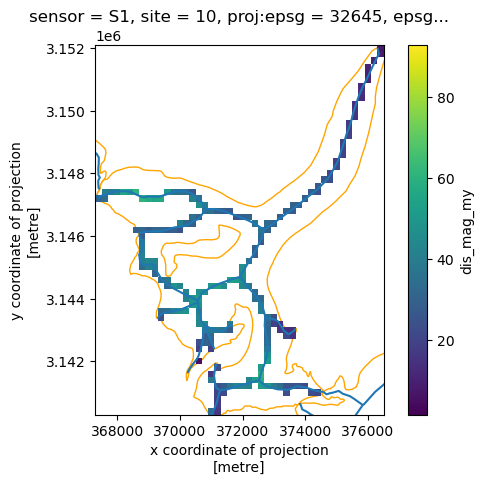

In [140]:
fig, ax = plt.subplots()
rgi_subset.plot(ax=ax, facecolor='None', edgecolor='orange')

im = retreat_flowline_dict['RGI60-15.10299'].dis_mag_my.mean(dim='time').plot(ax=ax, vmax=vmax, vmin=vmin)
#im1= retreat_flowline_dict['RGI60-15.10290'].dis_mag_my.mean(dim='time').plot(ax=ax, vmax=vmax, vmin=vmin)

retreat_centerlines.plot(ax=ax)
    
#    im = retreat_flowline_dict[key].dis_mag_my.mean(dim='time').plot(ax=ax, vmax=vmax, vmin=vmin)
#fig.subplots_adjust(right=0.85)
#cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
#fig.colorbar(im, cax=cbar_ax)

In [70]:
rgi_subset.loc[rgi_subset['RGIId'] == 'RGI60-15.09271']

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry


In [69]:
retreat_centerlines.loc[retreat_centerlines['RGIId'] == 'RGI60-15.09271']

,GLIMSId,Type,MaxL,MeanL,ELA,AccL,AblationL,geometry,RGIId,Area


In [109]:
def outline2centerline(retreat_dict,centerline_df):
    val_ls, rgi_ls = [],[]
    
    for key in retreat_dict.keys():
        if key == 'RGI60-15.09271':
            print('this glacier is missing from centerline df')
        elif key == 'RGI60-15.09283':
            print('missing from cneterline df')
        elif key == 'RGI60-15.09354':
            print('missing also')
        elif key == 'RGI60-15.09361':
            print('missing also')
        elif key == 'RGI60-15.09377':
            print('missing also')
        elif key == 'RGI60-15.10286':
            print('missing too')
            
        else:
            print(key)
            rgi_ls.append(key)
            gpdf = centerline_df.loc[centerline_df['RGIId'] == key]
            centerline_ds = retreat_dict[key].rio.clip(gpdf.geometry, gpdf.crs)
            val_ls.append(centerline_ds)

    centerline_dict = dict(zip(rgi_ls, val_ls))
    return centerline_dict

In [111]:
retreat_flowline_dict = outline2centerline(retreat_dict, retreat_centerlines)

RGI60-15.03976
RGI60-15.04119
RGI60-15.04121
RGI60-15.04176
RGI60-15.04220
RGI60-15.09249
RGI60-15.09255
this glacier is missing from centerline df
missing from cneterline df
RGI60-15.09308
RGI60-15.09338
RGI60-15.09350
missing also
missing also
missing also
RGI60-15.09483
RGI60-15.10255
RGI60-15.10279
RGI60-15.10285
missing too
RGI60-15.10290
RGI60-15.10299


In [112]:
retreat_flowline_dict.keys()

dict_keys(['RGI60-15.03976', 'RGI60-15.04119', 'RGI60-15.04121', 'RGI60-15.04176', 'RGI60-15.04220', 'RGI60-15.09249', 'RGI60-15.09255', 'RGI60-15.09308', 'RGI60-15.09338', 'RGI60-15.09350', 'RGI60-15.09483', 'RGI60-15.10255', 'RGI60-15.10279', 'RGI60-15.10285', 'RGI60-15.10290', 'RGI60-15.10299'])

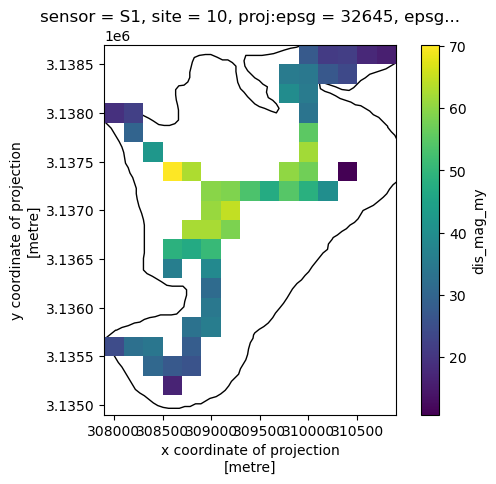

In [141]:
fig, ax = plt.subplots()
rgi_subset.loc[rgi_subset['RGIId'] == 'RGI60-15.03976'].plot(ax=ax, facecolor='None', edgecolor='black')
retreat_flowline_dict['RGI60-15.03976'].dis_mag_my.mean(dim='time').plot(ax=ax)

In [118]:
retreat_flowline_dict['RGI60-15.03976']

<xarray.Dataset>
Dimensions:         (time: 76, x: 15, y: 19)
Coordinates: (12/18)
  * time            (time) datetime64[ns] 2014-10-31 2014-11-12 ... 2021-02-26
  * x               (x) float64 3.08e+05 3.082e+05 ... 3.106e+05 3.108e+05
  * y               (y) float64 3.139e+06 3.138e+06 ... 3.135e+06 3.135e+06
    id              (time) object ...
    sensor          object ...
    img1_id         (time) object ...
    ...              ...
    epsg            int64 ...
    img1_date       (time) datetime64[ns] ...
    img2_date       (time) datetime64[ns] ...
    img_separation  (time) float64 ...
    crs             int64 ...
    spatial_ref     int64 0
Data variables: (12/16)
    dis_ang         (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    dis_az          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    dis_mag         (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    dis_N_ang       (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    dis_r           (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan
    cov             (time) float64 ...
    ...              ...
    z2              (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    z3              (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    z0_sem          (time) float64 ...
    z1_sem          (time) float64 ...
    z2_sem          (time) float64 ...
    z3_sem          (time) float64 ...
Attributes:
    spec:        RasterSpec(epsg=32645, bounds=(112800.0, 2966800.0, 487800.0...
    resolution:  200.0

In [29]:
retreat_land_dict = dict((k, retreat_dict[k]) for k in land_ids if k in retreat_dict)

In [30]:
retreat_lake_dict = dict((k, retreat_dict[k]) for k in lake_ids if k in retreat_dict)

In [18]:
test_ds = retreat_dict['RGI60-15.03976']

In [19]:
test_ds

<xarray.Dataset>
Dimensions:         (time: 76, x: 15, y: 19)
Coordinates: (12/18)
  * time            (time) datetime64[ns] 2014-10-31 2014-11-12 ... 2021-02-26
  * x               (x) float64 3.08e+05 3.082e+05 ... 3.106e+05 3.108e+05
  * y               (y) float64 3.139e+06 3.138e+06 ... 3.135e+06 3.135e+06
    id              (time) object ...
    sensor          object ...
    img1_id         (time) object ...
    ...              ...
    epsg            int64 ...
    img1_date       (time) datetime64[ns] ...
    img2_date       (time) datetime64[ns] ...
    img_separation  (time) float64 ...
    spatial_ref     int64 ...
    crs             int64 ...
Data variables: (12/16)
    dis_ang         (time, y, x) float64 ...
    dis_az          (time, y, x) float64 ...
    dis_mag         (time, y, x) float64 ...
    dis_N_ang       (time, y, x) float64 ...
    dis_r           (time, y, x) float64 ...
    cov             (time) float64 ...
    ...              ...
    z2              (y, x) float32 ...
    z3              (y, x) float32 ...
    z0_sem          (time) float64 ...
    z1_sem          (time) float64 ...
    z2_sem          (time) float64 ...
    z3_sem          (time) float64 ...
Attributes:
    spec:        RasterSpec(epsg=32645, bounds=(112800.0, 2966800.0, 487800.0...
    resolution:  200.0

In [20]:
dt = DataTree.from_dict(retreat_dict)

In [21]:
test_ds_z0 = test_ds.where(test_ds.z0.notnull, drop=True)
test_ds_z1 = test_ds.where(test_ds.z1.notnull, drop=True)
test_ds_z2 = test_ds.where(test_ds.z2.notnull, drop=True)
test_ds_z3 = test_ds.where(test_ds.z3.notnull, drop=True)

In [19]:
test_ds_z0

<xarray.Dataset>
Dimensions:         (time: 76, y: 10, x: 8)
Coordinates: (12/18)
  * time            (time) datetime64[ns] 2014-10-31 2014-11-12 ... 2021-02-26
  * x               (x) float64 3.08e+05 3.082e+05 ... 3.092e+05 3.094e+05
  * y               (y) float64 3.139e+06 3.138e+06 ... 3.137e+06 3.137e+06
    id              (time) object ...
    sensor          <U2 'S1'
    img1_id         (time) object 'C51B' 'C035' '1CFB' ... '3F51' '3F51' 'BDD5'
    ...              ...
    epsg            int64 32645
    img1_date       (time) datetime64[ns] 2014-10-19T00:18:54 ... 2021-02-20T...
    img2_date       (time) datetime64[ns] ...
    img_separation  (time) float64 -24.0 -24.0 -24.0 -24.0 ... -12.0 -48.0 -12.0
    spatial_ref     int64 0
    crs             int64 0
Data variables: (12/16)
    dis_ang         (time, y, x) float64 nan nan nan nan ... -1.597 nan nan nan
    dis_az          (time, y, x) float64 nan nan nan nan ... -0.174 nan nan nan
    dis_mag         (time, y, x) float64 nan nan nan nan ... 0.174 nan nan nan
    dis_N_ang       (time, y, x) float64 nan nan nan nan ... 14.08 nan nan nan
    dis_r           (time, y, x) float64 nan nan nan nan ... nan nan nan
    cov             (time, y, x) float64 nan nan nan nan ... 0.5283 nan nan nan
    ...              ...
    z2              (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    z3              (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
    z0_sem          (time, y, x) float64 nan nan nan nan ... 6.305 nan nan nan
    z1_sem          (time, y, x) float64 nan nan nan nan ... 4.335 nan nan nan
    z2_sem          (time, y, x) float64 nan nan nan nan ... 6.123 nan nan nan
    z3_sem          (time, y, x) float64 nan nan nan nan ... 2.773 nan nan nan
Attributes:
    spec:        RasterSpec(epsg=32645, bounds=(112800.0, 2966800.0, 487800.0...
    resolution:  200.0

In [22]:
dates1 = test_ds_z0.img1_date.values
dates2 = test_ds_z0.img2_date.values
yvals = test_ds_z0.dis_mag_my.mean(dim=['x','y']).values
widths = test_ds_z0.img_separation.values

In [23]:
test_df = pd.DataFrame({'img1':dates1,'img2':dates2,'speeds':yvals,'span':widths*-1})

Text(0, 0.5, 'Magnitude of velocity (m/y)')

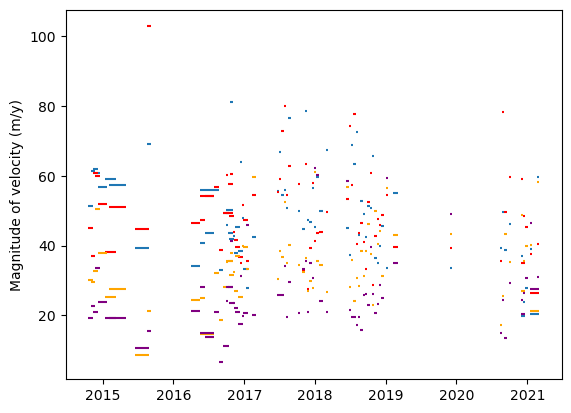

In [24]:
fig, ax = plt.subplots()
#ax=ax.xaxis_date()
ax.hlines(xmin=test_df['img1'], xmax = test_df['img2'], y=test_df['speeds'])
ax.hlines(xmin=test_ds_z1.img1_date, xmax=test_ds_z1.img2_date, y=test_ds_z1.dis_mag_my.mean(dim=['x','y']), color='red')
ax.hlines(xmin=test_ds_z2.img1_date, xmax=test_ds_z2.img2_date, y=test_ds_z2.dis_mag_my.mean(dim=['x','y']), color='orange')
ax.hlines(xmin=test_ds_z3.img1_date, xmax=test_ds_z3.img2_date, y=test_ds_z3.dis_mag_my.mean(dim=['x','y']), color='purple')

ax.set_ylabel('Magnitude of velocity (m/y)')

In [25]:
def timespan_plot_by_z(ds):
    ds_z0 = ds.where(ds.z0.notnull, drop=True)
    ds_z1 = ds.where(ds.z1.notnull, drop=True)
    ds_z2 = ds.where(ds.z2.notnull, drop=True)
    ds_z3 = ds.where(ds.z3.notnull, drop=True)

    fig, ax = plt.subplots()
    
    ax.hlines(xmin=ds_z0.img1_date, xmax=ds_z0.img2_date, y=ds_z0.dis_mag_my.mean(dim=['x','y']), color='blue')
    ax.hlines(xmin=ds_z1.img1_date, xmax=ds_z1.img2_date, y=ds_z1.dis_mag_my.mean(dim=['x','y']), color='green')
    ax.hlines(xmin=ds_z2.img1_date, xmax=ds_z2.img2_date, y=ds_z2.dis_mag_my.mean(dim=['x','y']), color='orange')
    ax.hlines(xmin=ds_z3.img1_date, xmax=ds_z3.img2_date, y=ds_z3.dis_mag_my.mean(dim=['x','y']), color='red')
    
    ax.set_ylabel('magnitude of velocity (m/y)')

In [26]:
def timespan_plot(ds, color,alpha):
    
    ax.hlines(xmin=ds.img1_date, xmax=ds.img2_date, y=ds.dis_mag_my.mean(dim=['x','y']), color=color, alpha = alpha)

In [27]:
land_pal = sns.color_palette("Reds_r", n_colors=24)
lake_pal = sns.color_palette('Blues_r', n_colors=8)

In [28]:
lake_pal

[(0.03137254901960784, 0.301914648212226, 0.588404459823145),
 (0.10557477893118032, 0.41262591311034214, 0.6859669357939254),
 (0.21568627450980393, 0.5294117647058824, 0.7542483660130719),
 (0.34646674356016915, 0.632402921953095, 0.8106728181468666),
 (0.5105882352941177, 0.7323029603998462, 0.8588389081122645),
 (0.6718954248366014, 0.8143790849673203, 0.9006535947712418),
 (0.7993540945790081, 0.8740792003075739, 0.944882737408689),
 (0.8825067281814687, 0.929196462898885, 0.9724413687043445)]

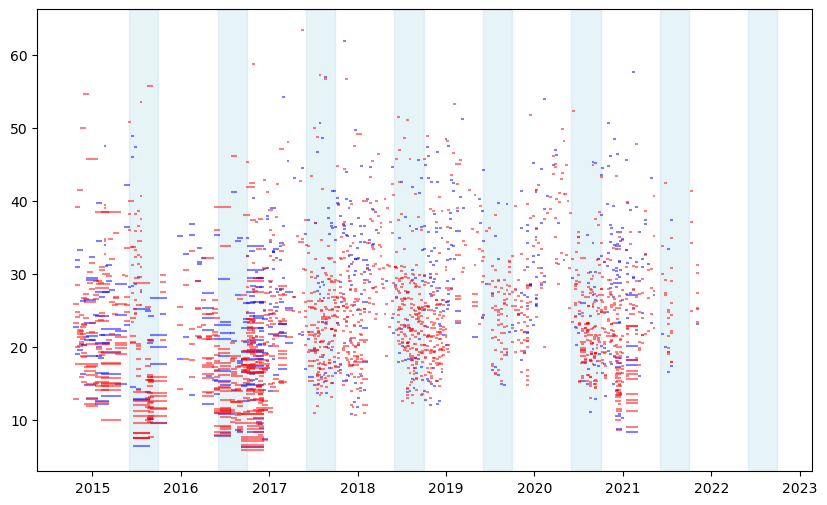

In [29]:
from matplotlib.dates import date2num
from datetime import datetime

fig, ax = plt.subplots(figsize=(10,6))

ax.axvspan(date2num(datetime(2015,6,1)), date2num(datetime(2015,9,30)), label='Monsoon', alpha=0.3, color='lightblue')
ax.axvspan(date2num(datetime(2016,6,1)), date2num(datetime(2016,9,30)), label='Monsoon', alpha=0.3, color='lightblue')
ax.axvspan(date2num(datetime(2017,6,1)), date2num(datetime(2017,9,30)), label='Monsoon', alpha=0.3, color='lightblue')
ax.axvspan(date2num(datetime(2018,6,1)), date2num(datetime(2018,9,30)), label='Monsoon', alpha=0.3, color='lightblue')
ax.axvspan(date2num(datetime(2019,6,1)), date2num(datetime(2019,9,30)), label='Monsoon', alpha=0.3, color='lightblue')
ax.axvspan(date2num(datetime(2020,6,1)), date2num(datetime(2020,9,30)), label='Monsoon', alpha=0.3, color='lightblue')
ax.axvspan(date2num(datetime(2021,6,1)), date2num(datetime(2021,9,30)), label='Monsoon', alpha=0.3, color='lightblue')
ax.axvspan(date2num(datetime(2022,6,1)), date2num(datetime(2022,9,30)), label='Monsoon', alpha=0.3, color='lightblue')


ticker_lake, ticker_land = 0,0
for key in retreat_lake_dict.keys():
    timespan_plot(retreat_dict[key], color = 'blue', alpha = 0.5)
    ticker_lake += 1 

for key in retreat_land_dict.keys():
    timespan_plot(retreat_dict[key], color= 'red', alpha = 0.5)

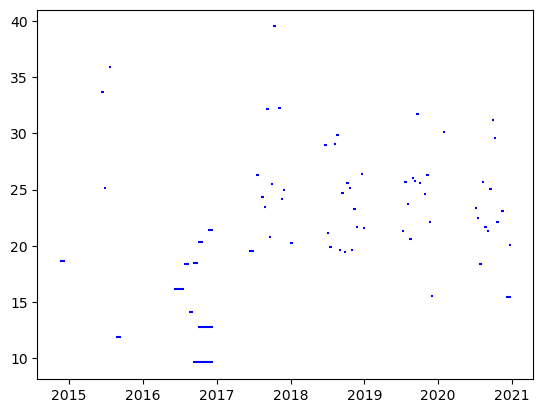

In [37]:
fig, ax = plt.subplots()

timespan_plot(dt['RGI60-15.04119'], 'blue',1)

In [59]:
test_ds_gb = test_ds.dis_mag_my.groupby(test_ds.time.dt.month).mean()

In [69]:
def monthly_mean_speeds(ds):
    
    gb = ds.dis_mag_my.groupby(ds.time.dt.month).mean()
    gb.mean(dim=['x','y']).plot(ax=ax)
    


maybe no data this month


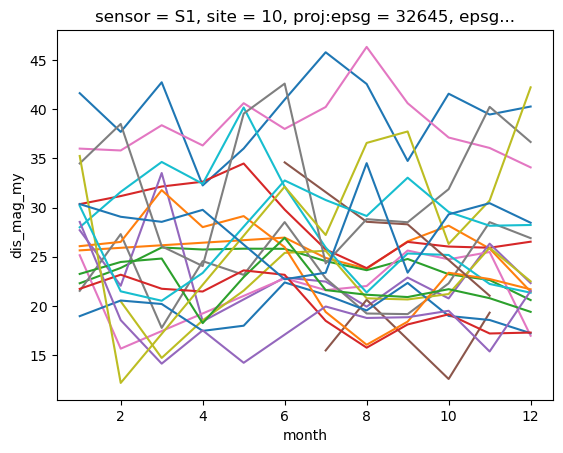

In [72]:
fig, ax = plt.subplots()

for key in retreat_dict.keys():
    try:
        monthly_mean_speeds(retreat_dict[key])
    except:
        print('maybe no data this month')
        pass
    

In [73]:
test_ds.dis_mag_my.mean(dim=['x','y'])

<xarray.DataArray 'dis_mag_my' (time: 76)>
array([39.25522516, 41.51991692, 50.00047813, 54.65722347, 45.74085004,
       38.5572643 , 38.51436045, 28.74276792, 55.82768099, 32.2529935 ,
       36.00302633, 39.13549208, 33.81929637, 46.15190777, 26.61634748,
       38.13025367, 45.41716349, 41.89997363, 42.50467735, 58.75627315,
       37.48467578, 37.19866229, 33.38473156, 37.61916006, 42.92119811,
       30.81810417, 41.26357788, 38.75325779, 35.41187413, 47.10162434,
       43.38430453, 50.03459129, 48.81056604, 57.31210445, 41.64600177,
       56.77068375, 44.78728115, 36.78584496, 56.80201529, 32.68505388,
       39.6262096 , 47.50971882, 49.25230889, 49.13318227, 39.9899772 ,
       45.51174566, 51.47020269, 38.23087435, 48.60464998, 51.10717098,
       45.75242134, 35.90241645, 41.04519681, 37.89781   , 36.11233461,
       45.78935744, 48.886728  , 38.98838556, 38.6655135 , 37.18544747,
       40.52521251, 38.66436536, 48.22676157, 45.02643885, 39.60626507,
       27.96217224, 44.98176702, 37.51836382, 43.30880085, 43.49312537,
       25.38139056, 35.10674789, 34.72567648, 39.90295514, 22.9192047 ,
       47.88333736])
Coordinates: (12/16)
  * time            (time) datetime64[ns] 2014-10-31 2014-11-12 ... 2021-02-26
    id              (time) object ...
    sensor          object ...
    img1_id         (time) object ...
    site            object ...
    img2_id         (time) object ...
    ...              ...
    epsg            int64 ...
    img1_date       (time) datetime64[ns] 2014-10-19T00:18:54 ... 2021-02-20T...
    img2_date       (time) datetime64[ns] 2014-11-12T00:18:54 ... 2021-03-04T...
    img_separation  (time) float64 ...
    spatial_ref     int64 ...
    crs             int64 ...

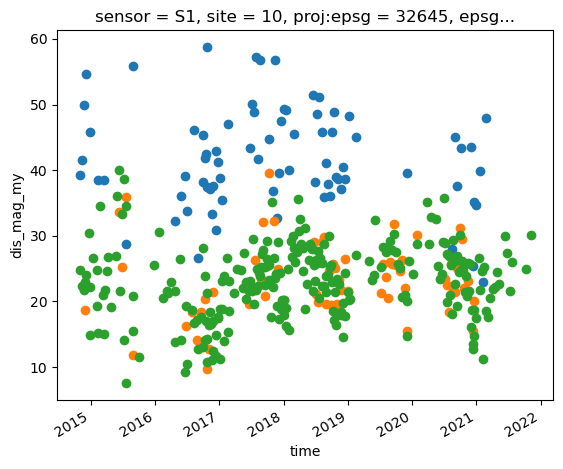

In [82]:
fig, ax = plt.subplots()

#test_ds.dis_mag_my.rolling(time=3).mean().mean(dim=['x','y']).plot(marker='o', linestyle='None', ax=ax)
test_ds.dis_mag_my.mean(dim=['x','y']).plot(marker='o',linestyle='None',ax=ax)
dt['RGI60-15.04119'].dis_mag_my.mean(dim=['x','y']).plot(marker='o', linestyle='None', ax=ax)
dt['RGI60-15.04121'].dis_mag_my.mean(dim=['x','y']).plot(marker='o', linestyle='None', ax=ax)

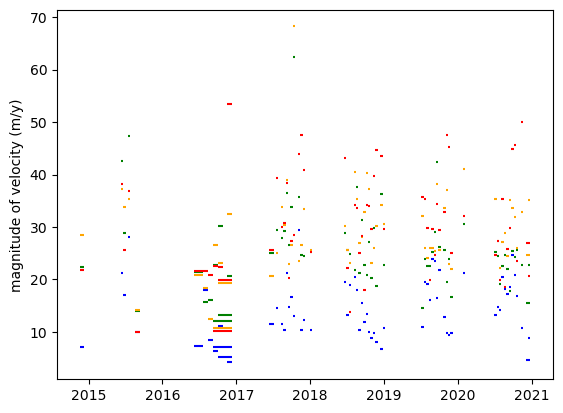

In [33]:
timespan_plot_by_z(dt['RGI60-15.04119'])

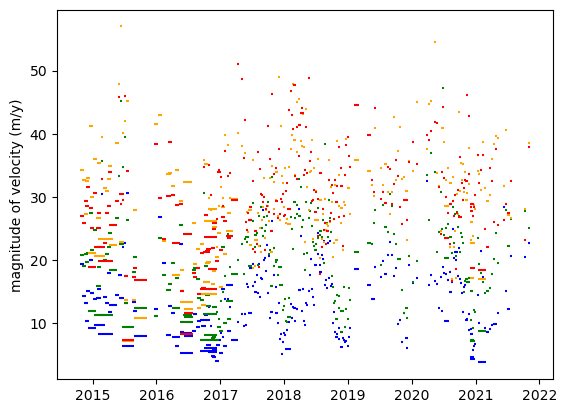

In [34]:
timespan_plot_by_z(dt['RGI60-15.04121'])

In [98]:
dt.groups

('/',
 '/RGI60-15.03976',
 '/RGI60-15.04119',
 '/RGI60-15.04121',
 '/RGI60-15.04176',
 '/RGI60-15.04220',
 '/RGI60-15.09249',
 '/RGI60-15.09255',
 '/RGI60-15.09271',
 '/RGI60-15.09283',
 '/RGI60-15.09308',
 '/RGI60-15.09338',
 '/RGI60-15.09350',
 '/RGI60-15.09354',
 '/RGI60-15.09361',
 '/RGI60-15.09483',
 '/RGI60-15.10255',
 '/RGI60-15.10279',
 '/RGI60-15.10285',
 '/RGI60-15.10286',
 '/RGI60-15.10290',
 '/RGI60-15.10299')